## 모집단에서 표본 추출 시뮬레이션

**추측통계** 배울 예정 

### 필요 라이브러리 

```
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

%precision 3
%matplotlib inline
```

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

import random as rd

sns.set()

%precision 3
%matplotlib inline



### 표본을 얻는 프로세스

- 표본: 확률변수
- {2,3,4,5,6} 물고기를 잡을 때, 잡히는 물고기는 확률의 법칙을 따름

### 5마리 물고기 예

```
fish5=np.array([2,3,4,5,6])
#np.random.seed(1)
np.random.choice(fish5,size=1,replace=False)
```

```

temp=np.random.random(100)*4+2

temp.mean()
```

In [3]:
fish5=np.array([2,3,4,5,6])
temp=np.random.choice(fish5,size=5000,replace=True)
float(temp.mean())

4.028

### 난수 

- 난수=Random number
- 과거에는 주사위, 동전으로 생성, 현재는 컴퓨터가 대행 
- 표본추출 = 난수 생성 작업 

### 복원추출 비복원추출 

- 표본 샘플링 
- 히스토그램 비교
 - 모집단1: 물고기 크기가 2-6cm까지의 물고기 수(총수=100,000)가 정규분포(normal distribution,평균=4,표준편차=0.8)을 갖는 경우
 - 모집단2: 물고기 크기가 2-6cm까지의 물고기 수(총수=100,000)가 균일분포(uniform distribution) 을 갖는 경우
 
- 표본의 분포~모집단 분포
- 표본의 평균, 표준편차값이 모집단의 그것 근처에 위치함.
- 샘플사이즈가 커지면 모집단이 갖는 모수를 잘 반영함.

## 표본 통계량 성질

- 표본 평균, 분산(표준편차)
- 표본분포: 표본의 통계량이 따르는 확률분포 


### 표본 평균의 성질 

![복수 시행](sampling_multi.png)
- 표본추출(샘플링)을 n번 하면 n개의 표본을 만들 수 있음
- n개의 표본의 평균이 나타내는 확률분포은 표본분포가 됨 
- 표본의 평균은 모집단 평균(모평균)에 가까움


In [4]:
# stats.norm 함수를 사용해도 같은 결과
whole1=np.random.normal(loc=4, scale=0.8, size=100000)

whole2=np.random.uniform(low=2, high=6, size=100000)

print('[whole1] mean:',float(whole1.mean()))
print('[whole1] std:',whole1.std(ddof=0))
print('[whole2] mean:',whole2.mean())
print('[whole2] std:',whole2.std(ddof=0))

[whole1] mean: 3.997733296789724
[whole1] std: 0.8011532878273084
[whole2] mean: 3.9996101242756965
[whole2] std: 1.1566627736954647


In [26]:
whole1[(3.5 < whole1) & (whole1  < 4.5)].shape

(46970,)

/Users/jiheo/opt/anaconda3/envs/khu-ml/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

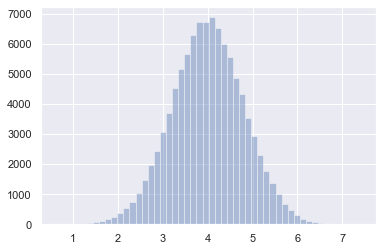

In [30]:
sns.distplot(whole1, kde=False)

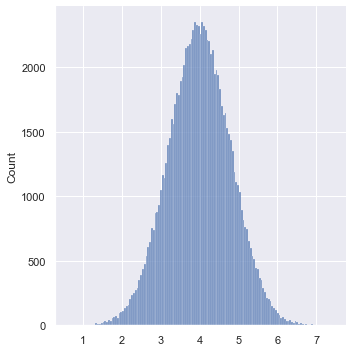

In [60]:
sns.displot(whole1,kde=False)

<AxesSubplot:ylabel='Count'>

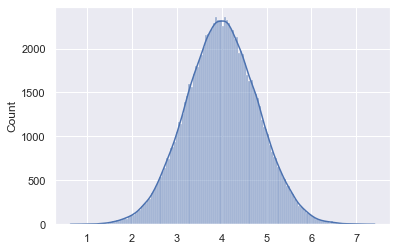

In [29]:
sns.histplot(whole1, kde=True)

<AxesSubplot:>

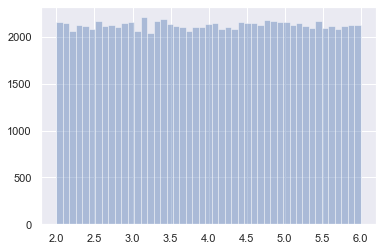

In [8]:
sns.distplot(whole2,kde=False)

3.964263479399722
0.7906101705368488


/Users/jiheo/opt/anaconda3/envs/khu-ml/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

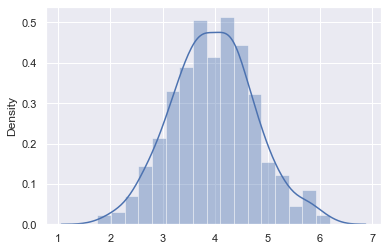

In [49]:
temp=np.random.choice(whole1,size=500,replace=False)
print(temp.mean())
print(temp.std(ddof=1))
sns.distplot(temp)

3.9991138722111668
1.153899334807322


/Users/jiheo/opt/anaconda3/envs/khu-ml/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

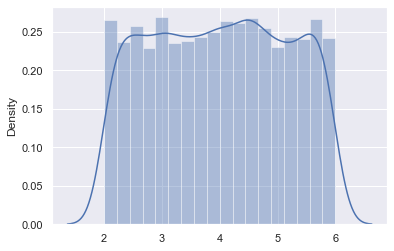

In [32]:
temp=np.random.choice(whole2,size=5000,replace=False)
print(temp.mean())
print(temp.std(ddof=1))
sns.distplot(temp)

In [46]:
def get_sample_data(whole, size, rep):
    mean = np.zeros(rep)
    std = np.zeros(rep)

    for i in range(rep):
        temp = np.random.choice(whole, size=size, replace=False)
        mean[i] = temp.mean()
        std[i] = temp.std(ddof=1)

    sns.displot(mean, kde=False)
    print('표본평균의 표준편차: %.3f' % mean.std(ddof=1))

표본평균의 표준편차: 0.036


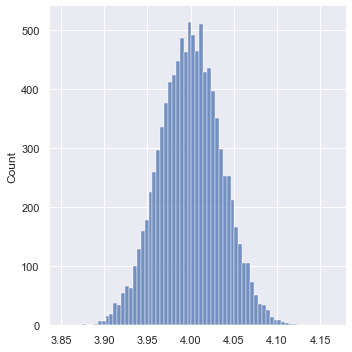

In [47]:
get_sample_data(whole2, 1000, 10000)

표본평균의 표준편차: 0.025


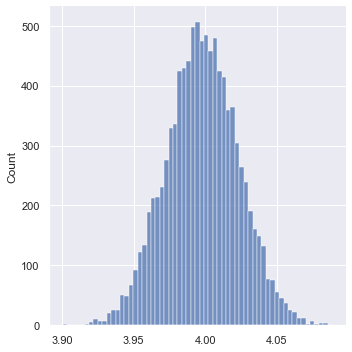

In [48]:
get_sample_data(whole1, 1000, 10000)

In [33]:
def sample_mean(whole,sizef,replace_flag,rep):
    
    y_mean=np.zeros(rep)

    for i in range(rep):
        temp=np.random.choice(whole,size=sizef,replace=replace_flag)
        y_mean[i]=temp.mean()
        
    ret=pd.DataFrame({
        'sample_size': np.tile(sizef,rep),
        'means': y_mean
    })
    
    return ret


In [34]:
sample_mean(whole1,30,'False',100)

,sample_size,means
0,30,4.246995
1,30,3.895115
2,30,3.793884
3,30,3.953171
4,30,3.779016
...,...,...
95,30,4.041607
96,30,3.921524
97,30,3.878705
98,30,3.913934


<AxesSubplot:xlabel='sample_size', ylabel='means'>

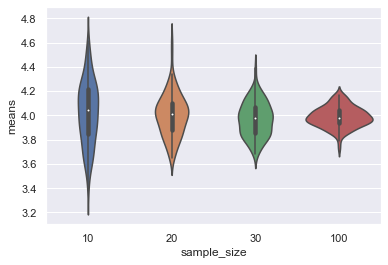

In [35]:
samp10=sample_mean(whole1,10,'False',100)
samp20=sample_mean(whole1,20,'False',100)
samp30=sample_mean(whole1,30,'False',100)
samp100=sample_mean(whole1,100,'False',100)
sampSizeEff=pd.concat([samp10,samp20,samp30,samp100])

sns.violinplot(x="sample_size",y="means",data=sampSizeEff)

### 표준오차

표본들의 평균값의 표준편차

$$ \textrm{standard error} = \frac{\sigma}{\sqrt{N}} $$

In [54]:
def get_standard_error(whole, rep, min_size=3, max_size=100):
    std_err = np.zeros(max_size-min_size)
    sample_size = np.zeros(max_size-min_size)

    for size in range(min_size, max_size):
        mean = np.zeros(rep)

        for i in range(rep):
            sample = np.random.choice(whole, size=size, replace=False)
            mean[i] = sample.mean()
        std_err[size - min_size] = mean.std(ddof=1)
        sample_size[size - min_size] = size

    plt.plot(sample_size, std_err)

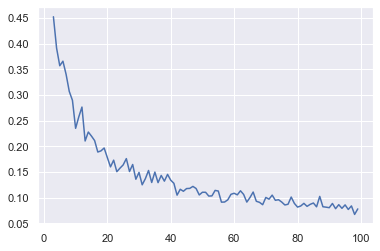

In [55]:
get_standard_error(whole1, rep=100)

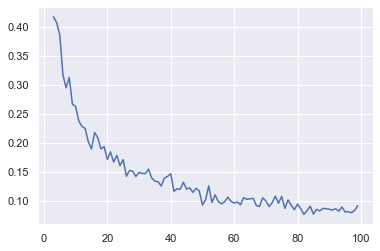

In [50]:
rep = 100

std_sample = np.zeros(97)
samp_size = np.zeros(97)

for sz in range(3,100):
    y1_mean = np.zeros(rep)
    y1_std = np.zeros(rep)

    for i in range(rep):
        temp = np.random.choice(whole1, size=sz, replace=False)
        y1_mean[i] = temp.mean()
    std_sample[sz-3] = y1_mean.std(ddof=1)
    samp_size[sz-3] = sz

plt.plot(samp_size, std_sample)

In [57]:
plt.plot(samp_size,std_sample*np.sqrt(samp_size))

ValueError: operands could not be broadcast together with shapes (97,) (997,) 

In [58]:
def get_mean_data(whole, min_size=3, max_size=100):
    sample_size = np.zeros(max_size - min_size)
    mean = np.zeros(max_size - min_size)

    for size in range(min_size, max_size):
        sample = np.random.choice(whole, size=size, replace=False)
        mean[size - min_size] = sample.mean()
        sample_size[size - min_size] = size

    plt.plot(sample_size, mean)

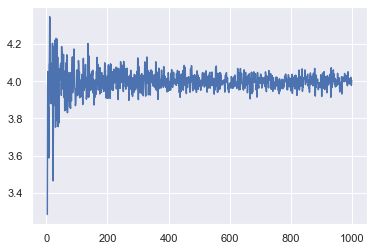

In [59]:
get_mean_data(whole1, max_size=1000)

In [ ]:
# 모집단 2에서 표본 추출하기
rep=10000

y2_mean=np.zeros(rep)
y2_std=np.zeros(rep)

for i in range(rep):
    temp=np.random.choice(whole2,size=50,replace=False)
    y2_mean[i]=temp.mean()
    y2_std[i]=temp.std(ddof=1)

y2_mean
sns.distplot(y2_mean,kde=False)

y2_mean.std(ddof=1)

In [ ]:


size=10000
x=np.arange(size)
y=np.zeros(size)
y_std=np.zeros(size)
y_var=np.zeros(size)


for i in x:
    # 교과서 rvs method와 같은 효과
    temp=np.random.choice(whole1,size=size,replace=False)
    y[i]=temp.mean()
    y_std[i]=temp.std(ddof=0)
    y_var[i]=temp.var(ddof=0)
    
for i in x:
    temp2=np.random.choice(whole2,size=size,replace=False)
    y[i]=temp2.mean()
    y_std[i]=temp2.std(ddof=0)
    y_var[i]=temp2.var(ddof=0)